# Black-Scholes Merton Model for Dividend Paying Stocks - AAPL

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [3]:
Apple = yf.download("AAPL", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

#AAPLis a dividend paying stock. Binomial tree, MonteCarlo,black scholes models
#do not factor in the dividend. Hence Black Scholes Merton was selected. 
#BSM model's stock return is not normally distriuted. 
#The european call is ideal for BSM
# The dividend factors into the model anticipates a lower option value, in comparison to earlier models. 

In [52]:
euro_option_bsm(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

#Option price achieved with the BSM model is $22.8899.
#Predicted to incease in value in the future.


22.889976341926534

In [53]:
euro_option_bsm(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')
#put option price assumed to fall with rising stock price. 
#Only observing the call option from this point. 
#with MonteCarlo simulation oserved earlier, price is predicted rise. 
#Which indicate that european puts are redundant and worthless until maturity. 

15.478062061818797

In [6]:
S = np.linspace(60,160,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bsm(S[i], 110, 1, 0.09, 0.0067, 0.46, 'call')

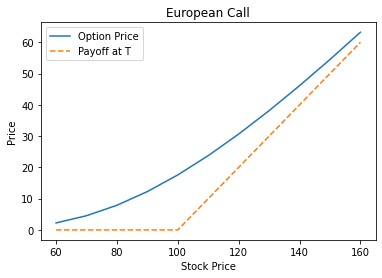

In [7]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

#the following graph shows BSM option price movement and pay off at time to maturity. 

In [8]:

T = np.linspace(0.46,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(108.67, 110, T[i], 0.09, 0.0067, 0.46, 'call')

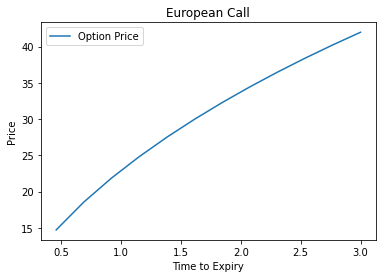

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])
#Graph below shows the AAPL euro call option movement of price against T. 

In [11]:
data = yf.download("AAPL", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [12]:

data['Adj Close']

Date
2019-10-31     60.973743
2019-11-01     62.704231
2019-11-04     63.116005
2019-11-05     63.025326
2019-11-06     63.052284
                 ...    
2020-10-26    114.851852
2020-10-27    116.399178
2020-10-28    111.008476
2020-10-29    115.121384
2020-10-30    108.672516
Name: Adj Close, Length: 253, dtype: float64

In [22]:
S = 108.67
K = 110
T = 1 #Maturity of 1 year
r = 0.0095
q = 0.0207
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1)) #the log Adj. Close prices assume that the implied volatilities are the same for all possible strike prices
vol = np.sqrt(252) * log_return.std() #252 trading days out of 365 
vol 

# the answer here is justification of the annualized volatility picked as 0.46

0.4588285598299272

# Has BSM correctly predicted the market value of options

In [24]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2020-12-31')
opt.calls

#The different prices of options agaisnt BSM pricing individually is shown. 
#The estimated error calculation is difference of the above factors. 
# Estimated error (#Percentage difference) = last price of the option - BSM price of the option/BSM price * 100



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL201231C00085000,2020-12-15 15:14:38,85.0,40.90,0.00,0.00,3.860001,10.421168,2,57,0.000010,True,REGULAR,USD
1,AAPL201231C00090000,2020-12-15 17:38:07,90.0,36.65,0.00,0.00,1.800003,5.165002,31,25,0.000010,True,REGULAR,USD
2,AAPL201231C00095000,2020-12-15 15:12:20,95.0,31.10,0.00,0.00,1.200001,4.013381,8,23,0.000010,True,REGULAR,USD
3,AAPL201231C00100000,2020-12-15 20:59:11,100.0,28.00,0.00,0.00,4.530001,19.301239,132,580,0.000010,True,REGULAR,USD
4,AAPL201231C00105000,2020-12-15 20:43:46,105.0,22.75,0.00,0.00,4.200001,22.641514,5,229,0.000010,True,REGULAR,USD
5,AAPL201231C00106000,2020-12-14 15:58:53,106.0,17.35,0.00,0.00,-0.510000,-2.855544,2,45,0.000010,True,REGULAR,USD
6,AAPL201231C00107000,2020-12-15 19:26:19,107.0,20.50,0.00,0.00,3.150000,18.155617,1,64,0.000010,True,REGULAR,USD
7,AAPL201231C00108000,2020-12-11 15:57:26,108.0,13.88,14.75,14.95,-2.120000,-13.249999,1,56,0.000010,True,REGULAR,USD
8,AAPL201231C00109000,2020-12-15 15:35:52,109.0,17.38,0.00,0.00,3.589999,26.033350,20,60,0.000010,True,REGULAR,USD
9,AAPL201231C00110000,2020-12-15 20:46:17,110.0,17.85,0.00,0.00,4.050000,29.347828,404,1342,0.000010,True,REGULAR,USD


In [25]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1
r = 0.09
q = 0.0067
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.4588285598299272

In [26]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [27]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call)
opt.calls


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL201231C00085000,2020-12-15 15:14:38,85.0,40.90,0.00,0.00,3.860001,10.421168,2,57,0.000010,True,REGULAR,USD,36.008272
1,AAPL201231C00090000,2020-12-15 17:38:07,90.0,36.65,0.00,0.00,1.800003,5.165002,31,25,0.000010,True,REGULAR,USD,32.972283
2,AAPL201231C00095000,2020-12-15 15:12:20,95.0,31.10,0.00,0.00,1.200001,4.013381,8,23,0.000010,True,REGULAR,USD,30.142714
3,AAPL201231C00100000,2020-12-15 20:59:11,100.0,28.00,0.00,0.00,4.530001,19.301239,132,580,0.000010,True,REGULAR,USD,27.515879
4,AAPL201231C00105000,2020-12-15 20:43:46,105.0,22.75,0.00,0.00,4.200001,22.641514,5,229,0.000010,True,REGULAR,USD,25.085800
5,AAPL201231C00106000,2020-12-14 15:58:53,106.0,17.35,0.00,0.00,-0.510000,-2.855544,2,45,0.000010,True,REGULAR,USD,24.622740
6,AAPL201231C00107000,2020-12-15 19:26:19,107.0,20.50,0.00,0.00,3.150000,18.155617,1,64,0.000010,True,REGULAR,USD,24.167177
7,AAPL201231C00108000,2020-12-11 15:57:26,108.0,13.88,14.75,14.95,-2.120000,-13.249999,1,56,0.000010,True,REGULAR,USD,23.719039
8,AAPL201231C00109000,2020-12-15 15:35:52,109.0,17.38,0.00,0.00,3.589999,26.033350,20,60,0.000010,True,REGULAR,USD,23.278254
9,AAPL201231C00110000,2020-12-15 20:46:17,110.0,17.85,0.00,0.00,4.050000,29.347828,404,1342,0.000010,True,REGULAR,USD,22.844749


In [28]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error']

# estimated errors shown below are close to BSM price 

0     13.585013
1     11.153964
2      3.175844
3      1.759423
4     -9.311246
5    -29.536682
6    -15.174204
7    -41.481608
8    -25.338043
9    -21.863882
10   -25.329353
11   -31.361371
12   -30.050977
13   -33.481241
14   -35.767066
15   -41.889763
16   -42.521695
17   -47.273149
18   -52.227517
19   -52.786516
20   -56.836698
21   -60.675240
22   -64.397493
23   -66.849297
24   -70.283100
25   -73.268415
26   -76.380777
27   -78.698094
28   -81.240417
29   -83.376476
30   -85.537596
31   -87.255739
32   -88.910556
33   -91.582695
34   -95.632943
35   -97.419930
36   -98.292371
37   -98.534686
Name: estimate_error, dtype: float64

In [30]:
opt.calls['estimate_error'].describe()
#Two extreme value 'min' -98.534 and 'max'13.585 are observed

count    38.000000
mean    -51.602437
std      32.900306
min     -98.534686
25%     -80.604836
50%     -52.507017
75%     -29.665255
max      13.585013
Name: estimate_error, dtype: float64

In [31]:
#Mean estimation error is -51.60%
#With Standard deviation of 32.90 points
#Median is promising around -52.50%
#Standard deviation still seems high

Text(0.5, 1.0, 'Histogram of Estimate Error')

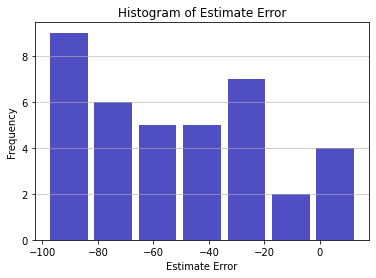

In [33]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

#The histogram depicts positive skewness addressed as BSM model limitation.
# The returns are not normally distributed. 
#The skewness of most values being negative indicates;
#Market price < BSM price.

# Mibian is used as a library for option pricing 

In [34]:

pip install mibian

  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4036 sha256=115dee9bb9878843979f3876fce150d6b4d493bcc3e77bf8fb7294a64b8388d4
  Stored in directory: /Users/deshithgamage/Library/Caches/pip/wheels/ac/d2/08/29d18978cfc7a7027fef186a04a809f81a424b421c6dbae25c
Successfully built mibian
Note: you may need to restart the kernel to use updated packages.


In [35]:
import mibian as mb

In [43]:
option_100 = mb.BS([S, 110, r*100, 252], volatility = vol*100)
#does not include dividend consideration
# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [44]:
option_100.callPrice

18.814086404963405

In [45]:
option_100d = mb.Me([S, 110, r*100, q*100, 252], volatility = vol*100)


#The model above has higher call price value due to non inclusion of dividend.
#Lower call price here is hence justified. 
# Used for pricing European options on stocks with dividends
# [underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)



In [46]:
option_100d.callPrice

18.526021913113787

In [47]:

AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 252], volatility = vol*100).callPrice

In [48]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL201231C00085000,2020-12-15 15:14:38,85.0,40.90,0.00,0.00,3.860001,10.421168,2,57,0.000010,True,REGULAR,USD,36.008272,13.585013,32.575163
1,AAPL201231C00090000,2020-12-15 17:38:07,90.0,36.65,0.00,0.00,1.800003,5.165002,31,25,0.000010,True,REGULAR,USD,32.972283,11.153964,29.277771
2,AAPL201231C00095000,2020-12-15 15:12:20,95.0,31.10,0.00,0.00,1.200001,4.013381,8,23,0.000010,True,REGULAR,USD,30.142714,3.175844,26.226153
3,AAPL201231C00100000,2020-12-15 20:59:11,100.0,28.00,0.00,0.00,4.530001,19.301239,132,580,0.000010,True,REGULAR,USD,27.515879,1.759423,23.420500
4,AAPL201231C00105000,2020-12-15 20:43:46,105.0,22.75,0.00,0.00,4.200001,22.641514,5,229,0.000010,True,REGULAR,USD,25.085800,-9.311246,20.856463
5,AAPL201231C00106000,2020-12-14 15:58:53,106.0,17.35,0.00,0.00,-0.510000,-2.855544,2,45,0.000010,True,REGULAR,USD,24.622740,-29.536682,20.371998
6,AAPL201231C00107000,2020-12-15 19:26:19,107.0,20.50,0.00,0.00,3.150000,18.155617,1,64,0.000010,True,REGULAR,USD,24.167177,-15.174204,19.896807
7,AAPL201231C00108000,2020-12-11 15:57:26,108.0,13.88,14.75,14.95,-2.120000,-13.249999,1,56,0.000010,True,REGULAR,USD,23.719039,-41.481608,19.430807
8,AAPL201231C00109000,2020-12-15 15:35:52,109.0,17.38,0.00,0.00,3.589999,26.033350,20,60,0.000010,True,REGULAR,USD,23.278254,-25.338043,18.973908
9,AAPL201231C00110000,2020-12-15 20:46:17,110.0,17.85,0.00,0.00,4.050000,29.347828,404,1342,0.000010,True,REGULAR,USD,22.844749,-21.863882,18.526022


In [49]:
opt.calls['estimate_error_mb'] = ((opt.calls['lastPrice'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb']

0     25.555780
1     25.180296
2     18.583919
3     19.553383
4      9.078898
5    -14.834080
6      3.031604
7    -28.567042
8     -8.400528
9     -3.649040
10    -7.447607
11   -14.481039
12   -12.389985
13   -16.243913
14   -18.688558
15   -26.041280
16   -26.446330
17   -32.155229
18   -38.188873
19   -38.570212
20   -43.523049
21   -48.252971
22   -52.882578
23   -55.874078
24   -60.214680
25   -64.001844
26   -68.005533
27   -70.973229
28   -74.284711
29   -77.075710
30   -79.935227
31   -82.211251
32   -84.426247
33   -88.032368
34   -93.592933
35   -96.090902
36   -97.326248
37   -97.627427
Name: estimate_error_mb, dtype: float64

In [50]:

opt.calls['estimate_error_mb'].describe()

count    38.000000
mean    -39.985548
std      37.799672
min     -97.627427
25%     -73.456841
50%     -38.379543
75%     -12.912749
max      25.555780
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

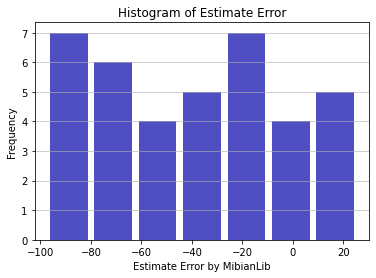

In [51]:

n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

In [ ]:
#Mean estimation error has improved to -39.98 from -51.60%
#Although Standard deviation has increased to 37.79 from 32.90 points
# Overall result is consistent